# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [1]:
# %pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [2]:
# %pip install --upgrade plotly

### Import Statements

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

C:\Users\eric-\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [5]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [6]:
print(df_data.shape)
print(f"The dataset has {df_data.shape[0]} rows and {df_data.shape[1]} columns")
print(f"The column names are: {df_data.columns}")

(4324, 9)
The dataset has 4324 rows and 9 columns
The column names are: Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')


In [7]:
print(f"There are {df_data['Price'].isna().sum()} NaN values")

There are 3360 NaN values


In [8]:
print(f"There are {df_data.duplicated().sum()} Duplicates")

There are 0 Duplicates


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [9]:
df_data.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], inplace=True)
df_data.head()

Organisation                                           Location  \
0       SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1         CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2       SpaceX                      Pad A, Boca Chica, Texas, USA   
3    Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4          ULA           SLC-41, Cape Canaveral AFS, Florida, USA   

                         Date                                        Detail  \
0  Fri Aug 07, 2020 05:12 UTC  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1  Thu Aug 06, 2020 04:01 UTC           Long March 2D | Gaofen-9 04 & Q-SAT   
2  Tue Aug 04, 2020 23:57 UTC            Starship Prototype | 150 Meter Hop   
3  Thu Jul 30, 2020 21:25 UTC  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4  Thu Jul 30, 2020 11:50 UTC                    Atlas V 541 | Perseverance   

  Rocket_Status  Price Mission_Status  
0  StatusActive   50.0        Success  
1  StatusActive  29.75        Success  
2  StatusActive    NaN        Success  
3  StatusActive   65.0        Success  
4  StatusActive  145.0        Success

## Descriptive Statistics

In [10]:
def fmt(x):
    return '{:.1f}%\n{:.0f}'.format(x, total*x/100)

In [11]:
df_data['Price'] = (
  df_data['Price']       
  .str.replace(',', '') 
  .astype(float)        
)

# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

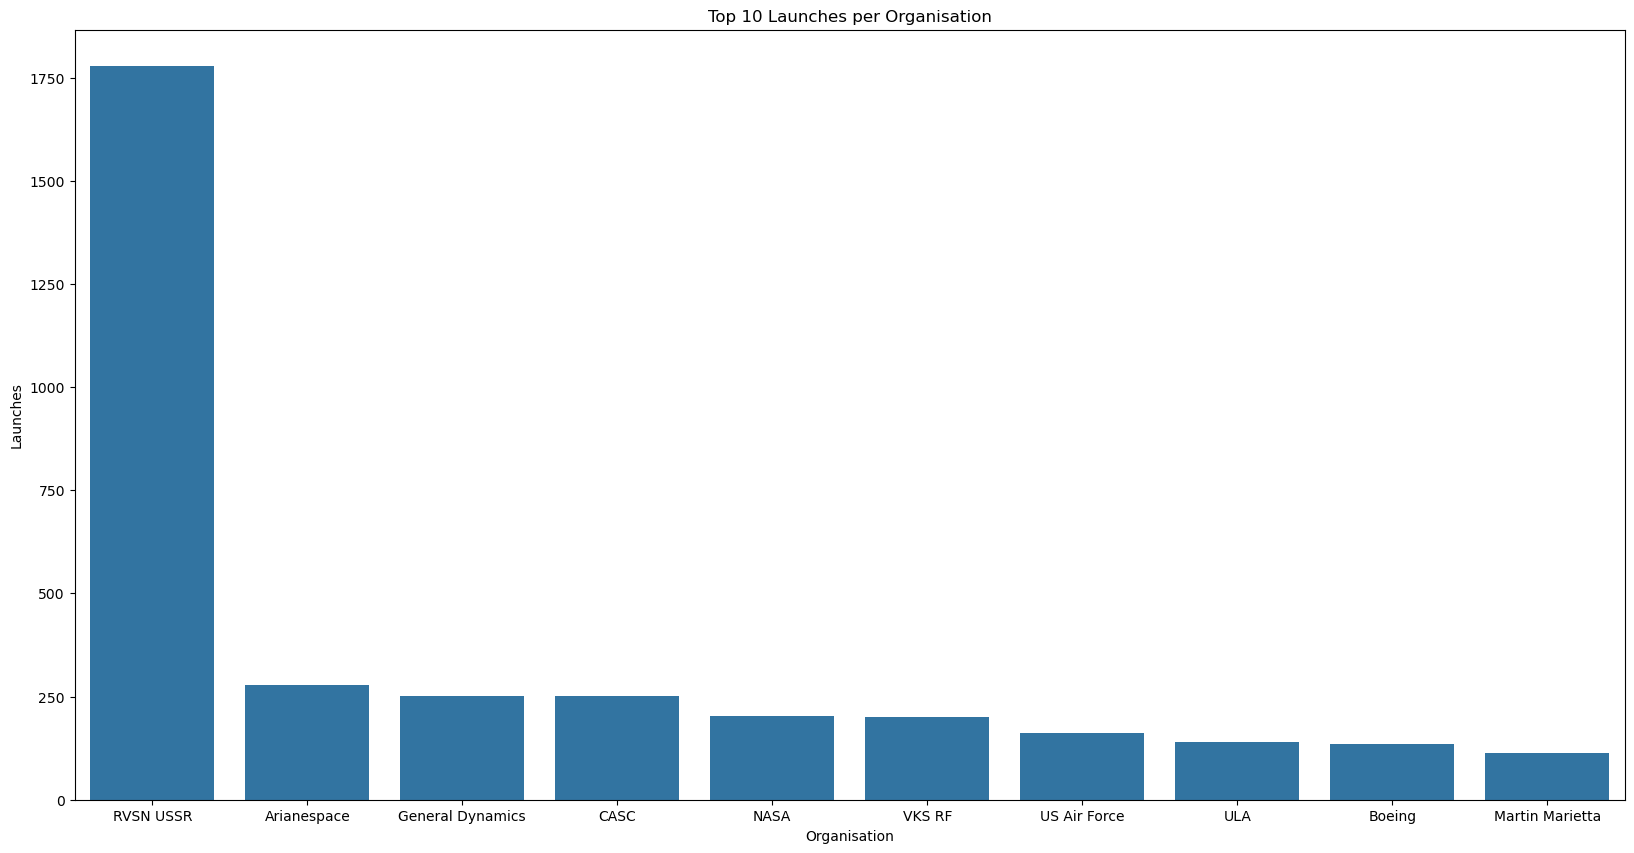

In [12]:
launches = df_data.groupby('Organisation', observed=True, as_index=False).agg(launches =('Organisation','count')).sort_values(by='launches', ascending=False)[:10]

plt.figure(figsize=(20, 10))
plt.title('Top 10 Launches per Organisation')
sns.barplot(
  data=launches,
  x='Organisation', 
  y='launches'
)

plt.ylabel('Launches')
plt.xlabel('Organisation')
plt.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

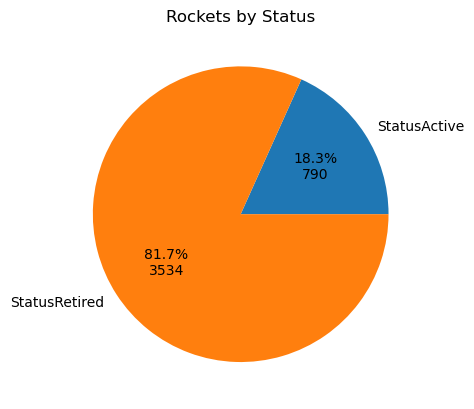

In [13]:
status = df_data.groupby('Rocket_Status', observed=True, as_index=False).agg(count = ('Rocket_Status','count'))
total = df_data['Rocket_Status'].value_counts().values.sum()

plt.figure()
plt.title('Rockets by Status')
plt.pie(data=status, x="count", labels='Rocket_Status', autopct=fmt) 

plt.show()

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

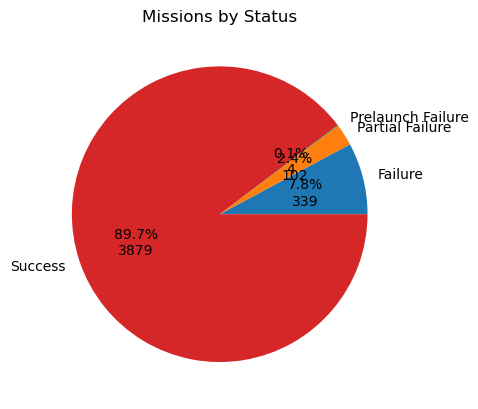

In [14]:
mission_status = df_data.groupby('Mission_Status', observed=True, as_index=False).agg(count = ('Mission_Status','count'))
total = df_data['Mission_Status'].value_counts().values.sum()

plt.figure()
plt.title('Missions by Status')
plt.pie(data=mission_status, x="count", labels='Mission_Status', autopct=fmt)

plt.show()

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

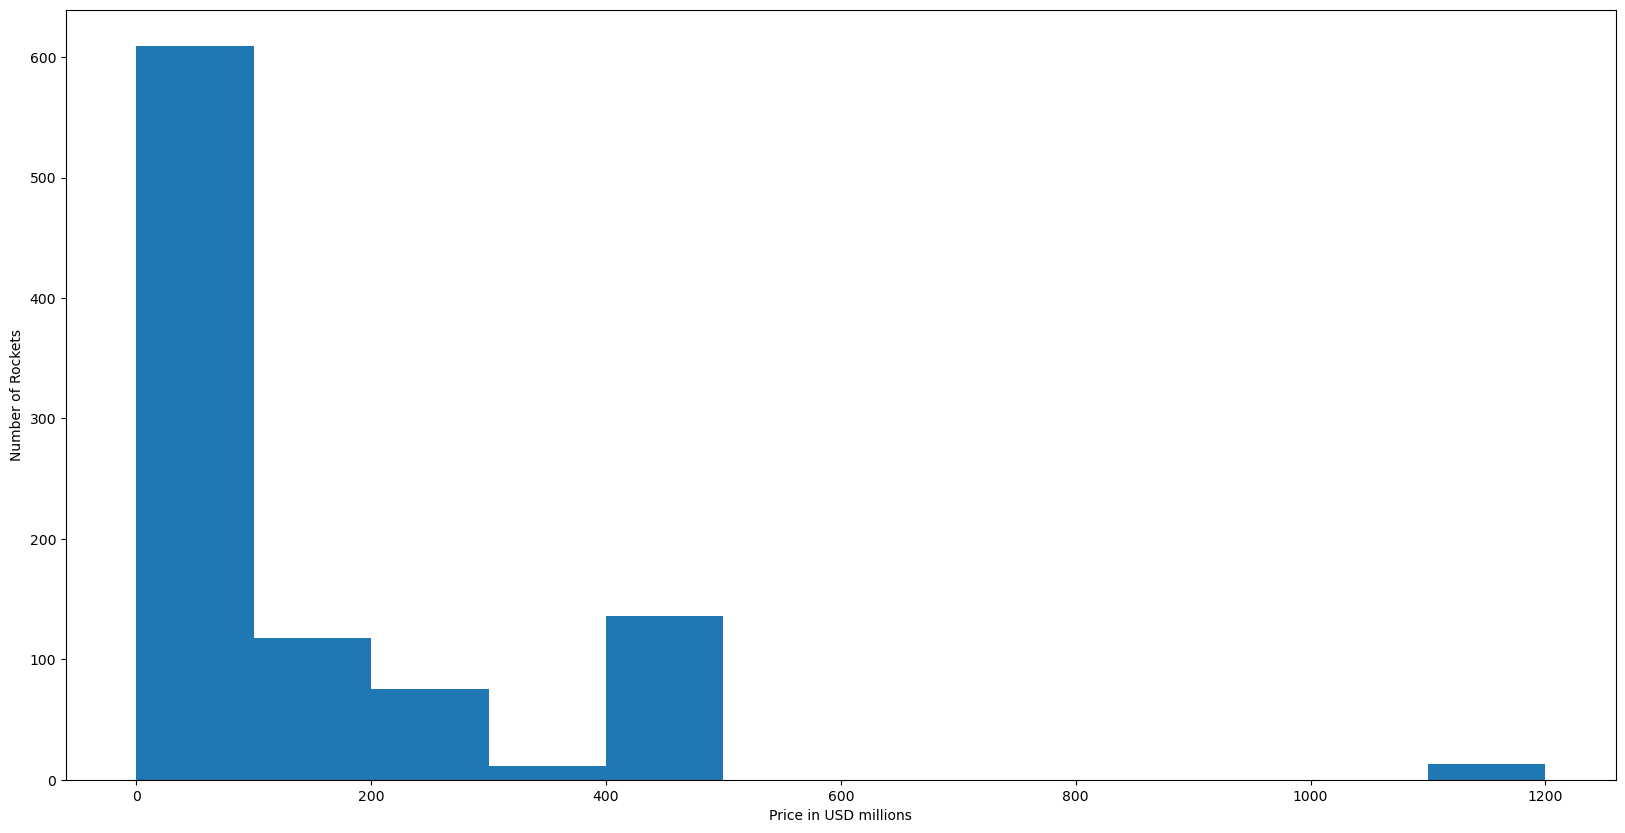

In [15]:
prices = df_data['Price'].loc[~df_data['Price'].isna()].sort_values().reset_index(drop=True)

plt.figure(figsize=(20,10))
plt.hist(prices, bins=np.arange(0, 1300, 100))
plt.ylabel("Number of Rockets")
plt.xlabel('Price in USD millions')
plt.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [16]:
# Make new column with country names
df_data['country'] = df_data['Location'].str.split(', ').str[-1]

In [17]:
# Adjust few old country names
caselist=[
    (df_data['country'] == 'Russia', 'Russian Federation'),
    (df_data['country'] == 'New Mexico', 'USA'),
    (df_data['country'] == 'Yellow Sea', 'China'),
    (df_data['country'] == 'Shahrud Missile Test Site', 'Iran'),
    (df_data['country'] == 'Pacific Missile Range Facility', 'USA'),
    (df_data['country'] == 'Barents Sea', 'Russian Federation'),
    (df_data['country'] == 'Gran Canaria', 'USA'),
]

df_data['country'] = df_data['country'].case_when(caselist)

# drop some countries that can't be converted by iso3166 package
keep = (df_data['country'] != 'Iran') & (df_data['country'] != 'North Korea') & (df_data['country'] != 'Pacific Ocean') & (df_data['country'] != 'South Korea')
new_df = df_data[keep]

# convert country names into alpha3
new_df['ISO'] = [countries.get(name).alpha3 for name in new_df['country']]

C:\Users\eric-\AppData\Local\Temp\ipykernel_24996\266752987.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['ISO'] = [countries.get(name).alpha3 for name in new_df['country']]


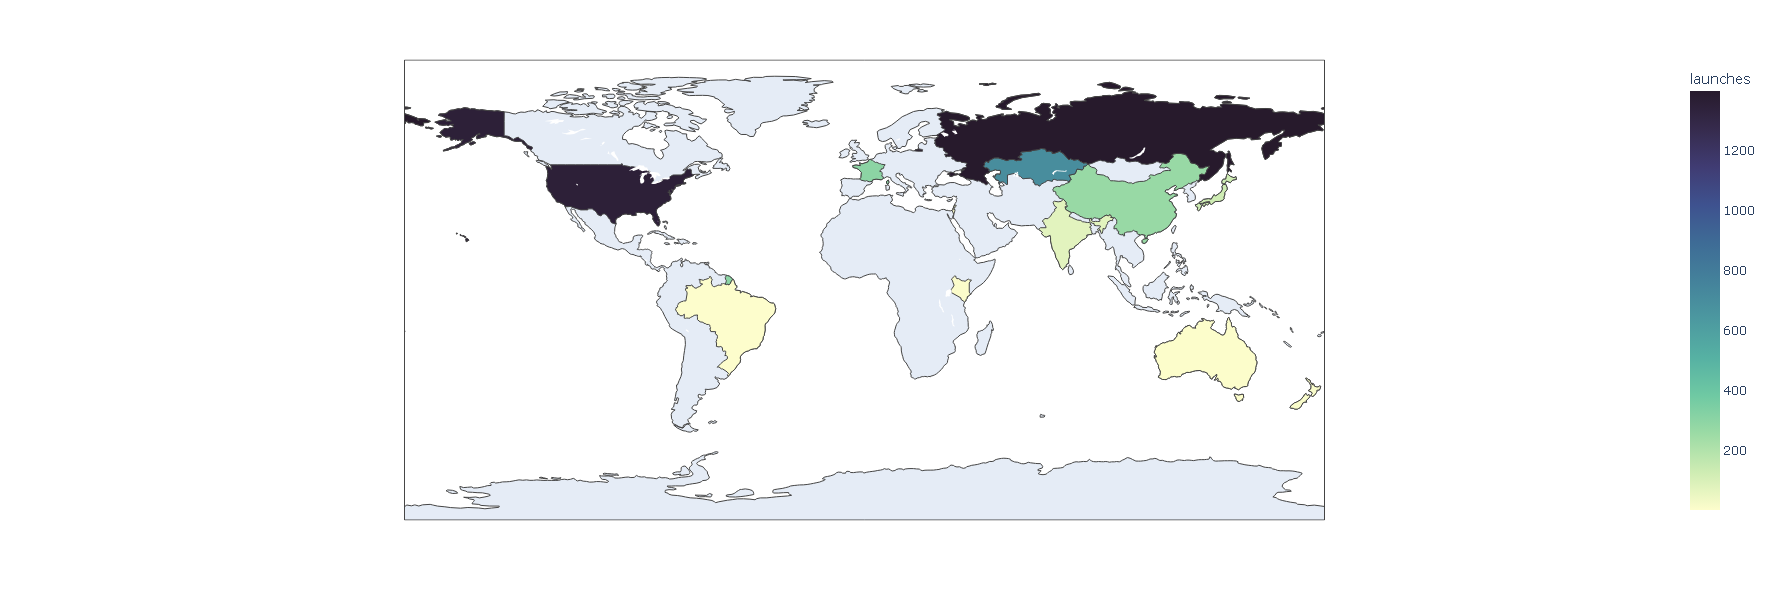

In [18]:
df_countries = new_df.groupby(['country', 'ISO'], 
                               as_index=False).agg(launches = ('country', 'count'))
df_countries.sort_values('launches', ascending=False)

world_map = px.choropleth(df_countries,
                          locations='ISO',
                          color='launches', 
                          hover_name='country', 
                          color_continuous_scale=px.colors.sequential.deep,
                          height=600)
 
world_map.update_layout(coloraxis_showscale=True,)
 
world_map.show()

# Use a Choropleth Map to Show the Number of Failures by Country


C:\Users\eric-\AppData\Local\Temp\ipykernel_24996\1169907981.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



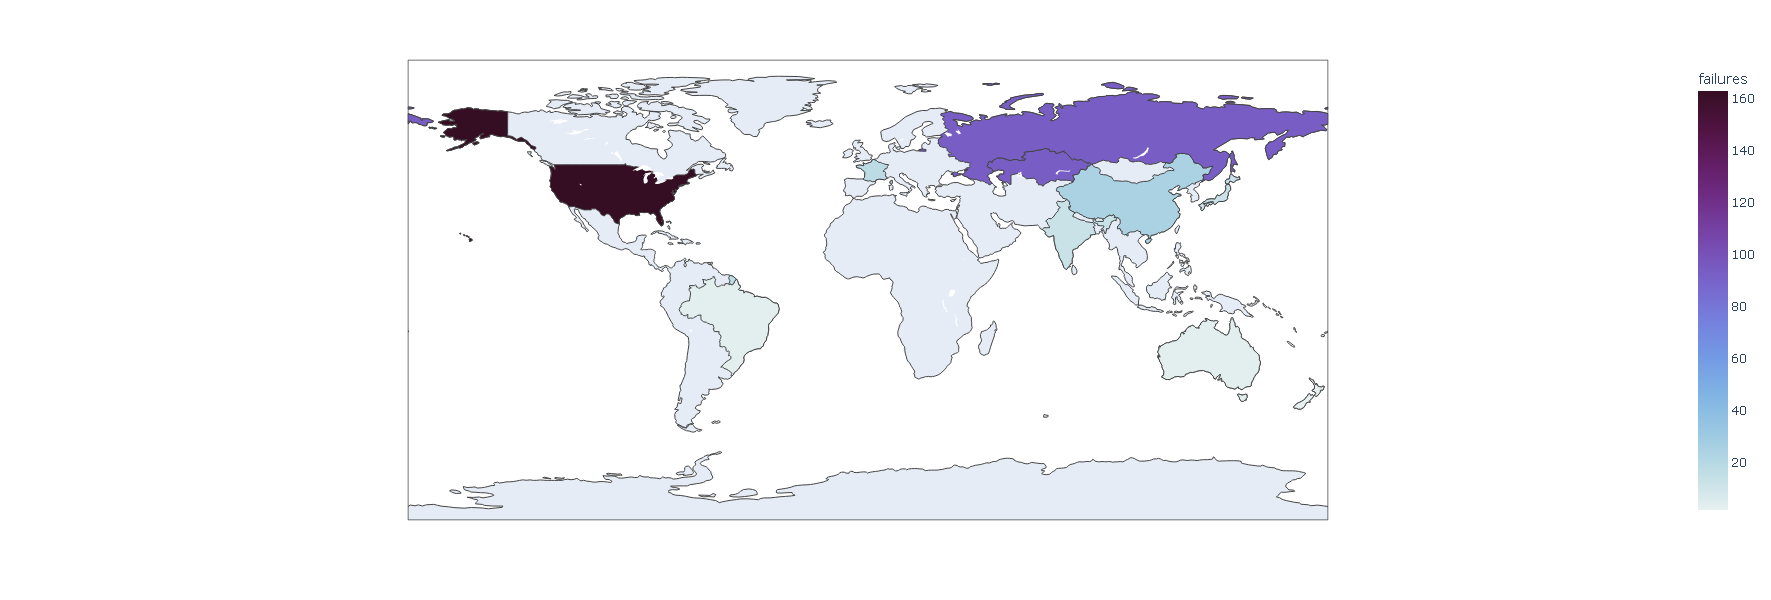

In [19]:
# Convert all different kinds of Failures to Failure
caselist=[
    (df_data['Mission_Status'] == 'Prelaunch Failure', 'Failure'),
    (df_data['Mission_Status'] == 'Partial Failure', 'Failure'),
]

new_df['Mission_Status'] = df_data['Mission_Status'].case_when(caselist)

# count Missions status per country
df_failures = new_df.groupby(['country', 'ISO', 'Mission_Status'], 
                               as_index=False).agg(failures = ('Mission_Status', 'count'))
df_failures.sort_values('failures', ascending=False)

# Only keep Failures
df_failures = df_failures[df_failures['Mission_Status'] == 'Failure']

world_map = px.choropleth(df_failures,
                          locations='ISO',
                          color='failures', 
                          hover_name='country', 
                          color_continuous_scale=px.colors.sequential.dense,
                          height=600)
 
world_map.update_layout(coloraxis_showscale=True,)
 
world_map.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

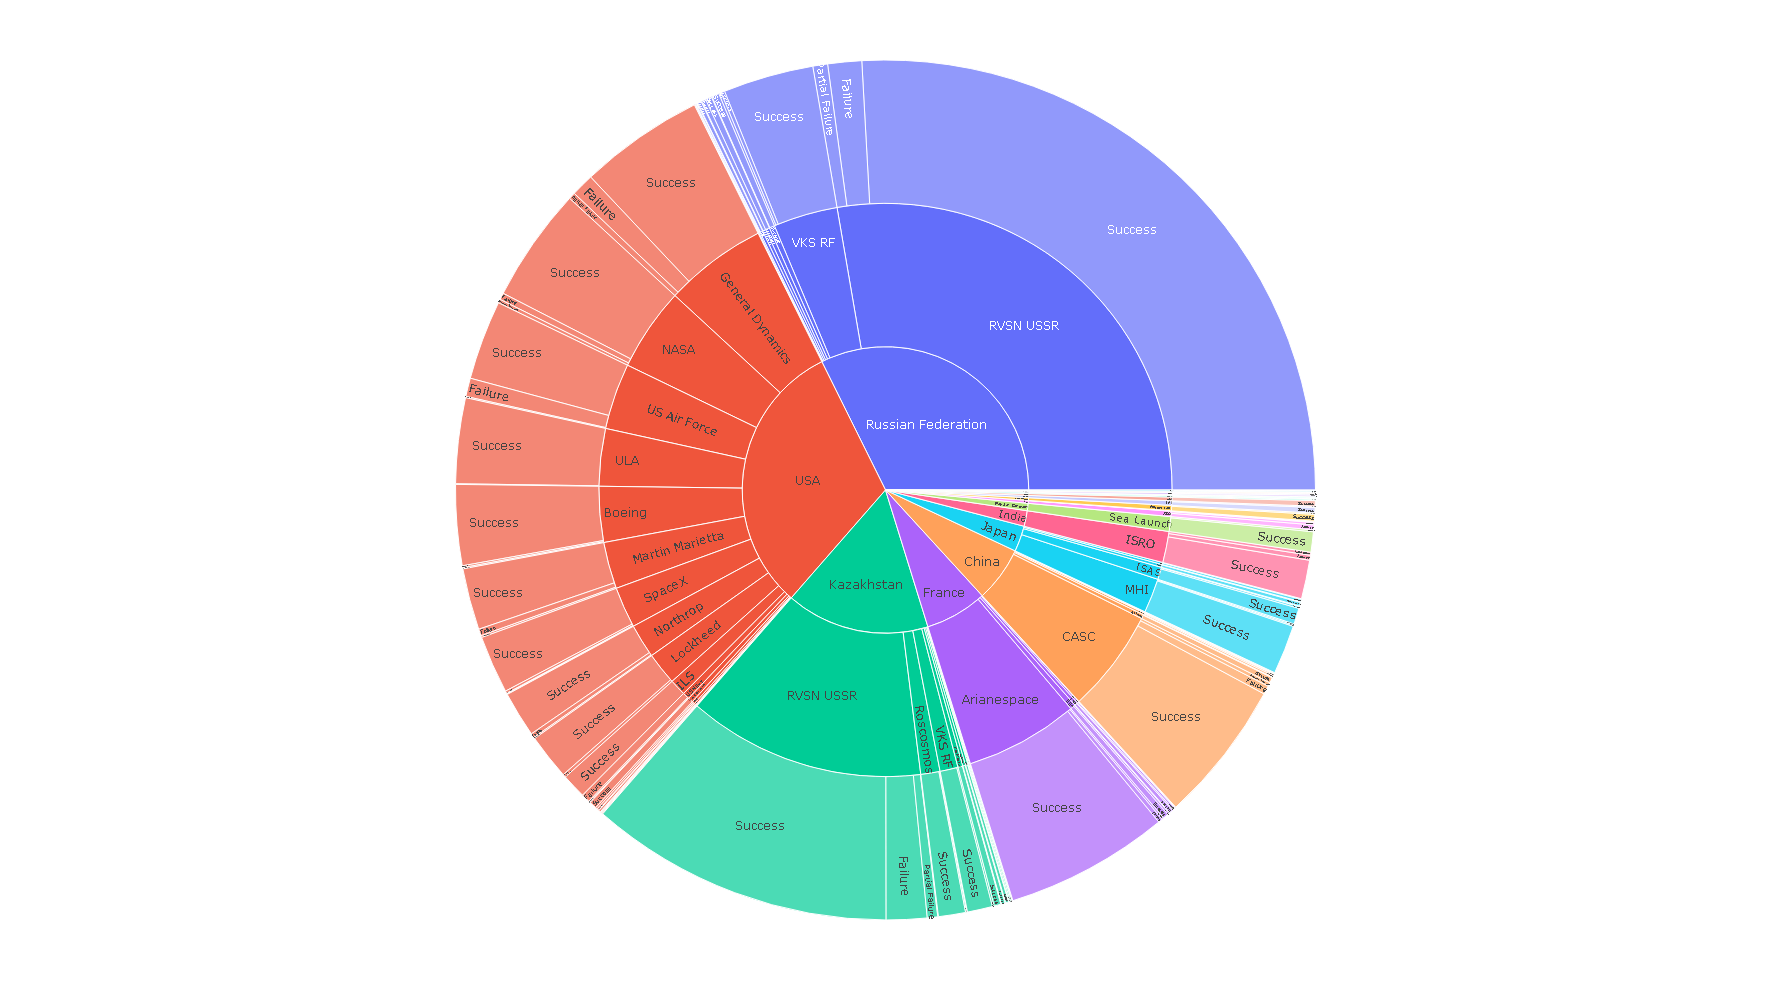

In [20]:
country_org_mission = df_data.groupby(by=['country', 
                                       'Organisation', 
                                       'Mission_Status'], as_index=False).agg(launches = ('country', 'count'))
 
country_org_mission = country_org_mission.sort_values('launches', ascending=False)

burst = px.sunburst(country_org_mission, 
                    path=['country', 'Organisation', 'Mission_Status'], 
                    values='launches',
                    height=1000)
 
burst.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

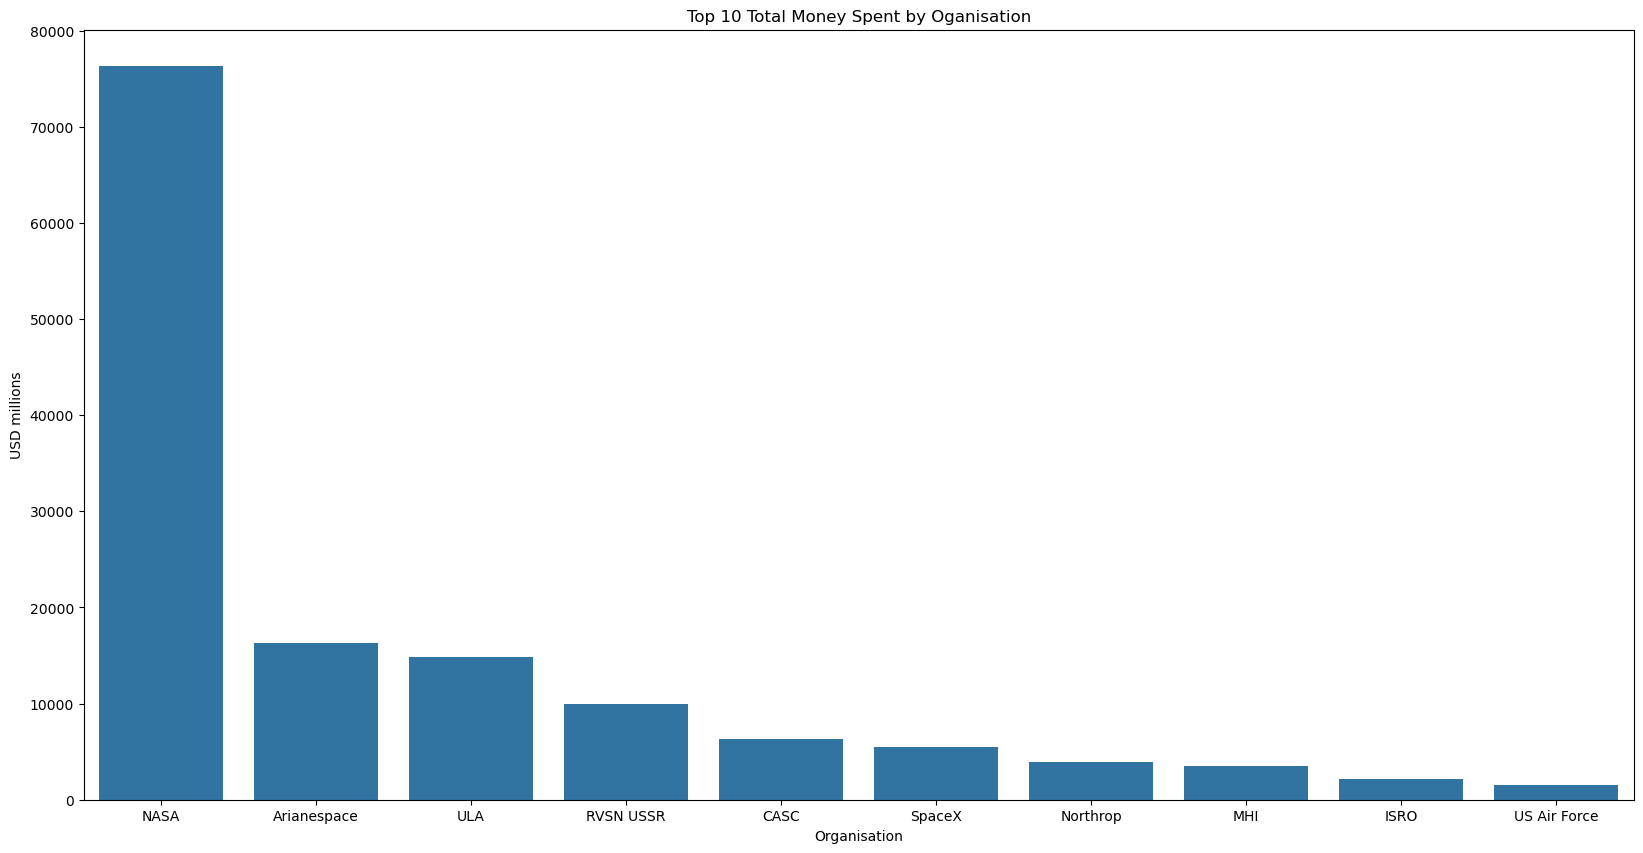

In [21]:
prices = df_data.loc[~df_data['Price'].isna()]
total_money = prices.groupby('Organisation', observed=True, as_index=False).agg({'Price':'sum'}).sort_values(by='Price', ascending=False)[:10]

plt.figure(figsize=(20, 10))
plt.title('Top 10 Total Money Spent by Oganisation')
sns.barplot(
  data=total_money,
  x='Organisation', 
  y='Price'
)

plt.ylabel('USD millions')
plt.xlabel('Organisation')
plt.show()

# Analyse the Amount of Money Spent by Organisation per Launch

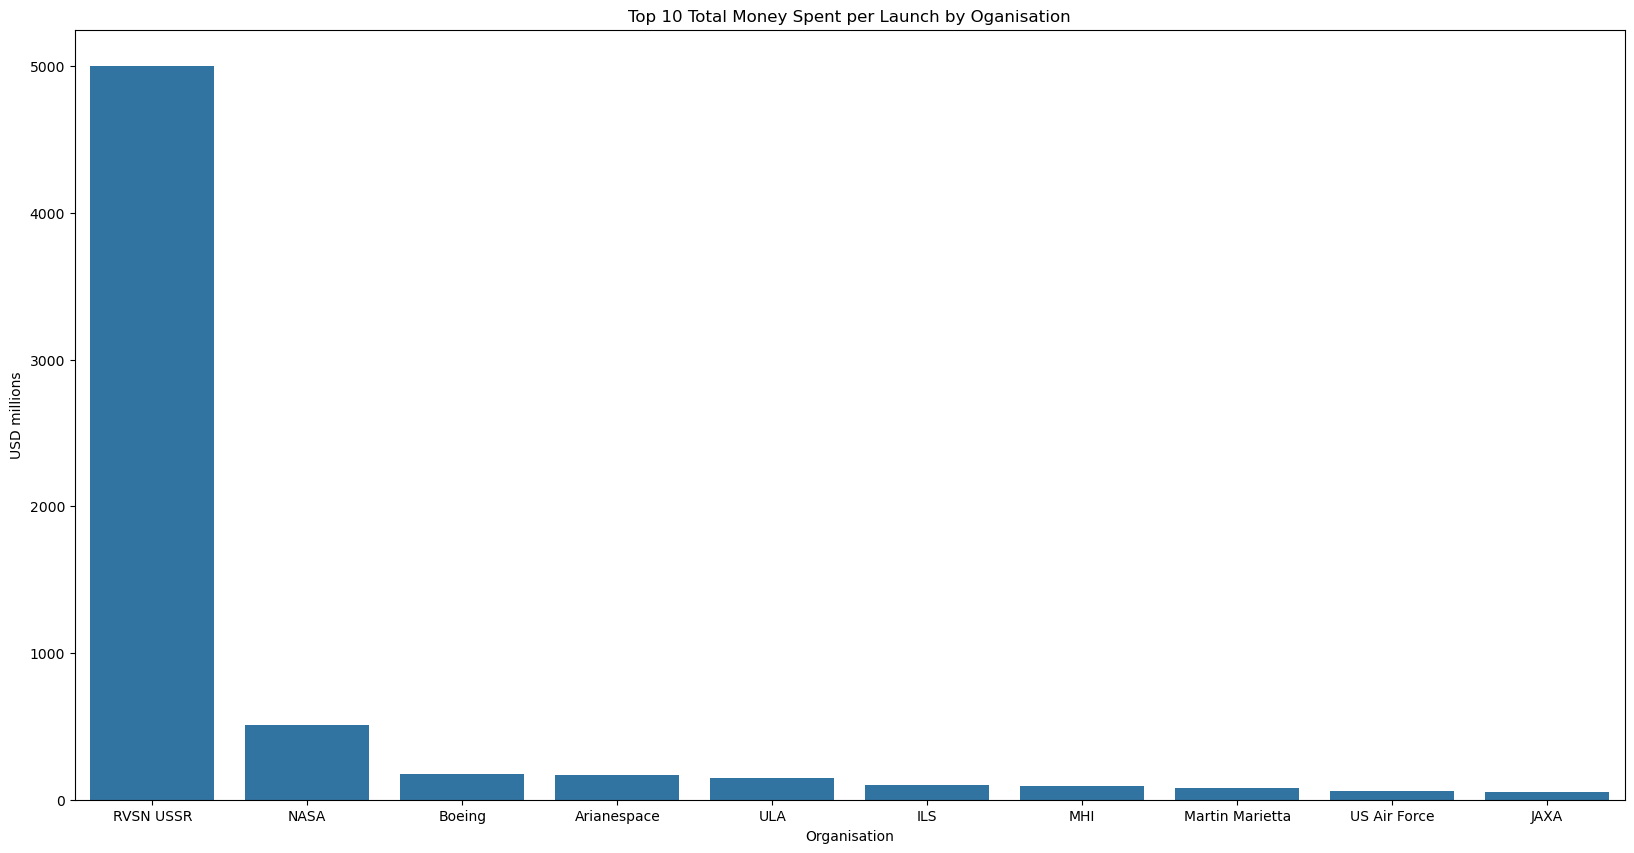

In [22]:
money_per_launch = prices.groupby('Organisation', observed=True, as_index=False).agg(total_money_spent = ('Price','sum'), launches = ('Organisation','count'))
money_per_launch['money_per_launch'] = money_per_launch['total_money_spent'] / money_per_launch['launches']
money_per_launch.sort_values(by='money_per_launch', ascending=False, inplace=True)

plt.figure(figsize=(20, 10))
plt.title('Top 10 Total Money Spent per Launch by Oganisation')
sns.barplot(
  data=money_per_launch[:10],
  x='Organisation', 
  y='money_per_launch'
)

plt.ylabel('USD millions')
plt.xlabel('Organisation')
plt.show()

# Chart the Number of Launches per Year

In [23]:
# Format string
df_data['year'] = df_data['Date'].str[4:16].str.replace(',','')

# Convert to datetime
df_data['year'] = pd.to_datetime(df_data['year'])

# Change format to years only
df_data['year'] = df_data['year'].dt.strftime("%Y")

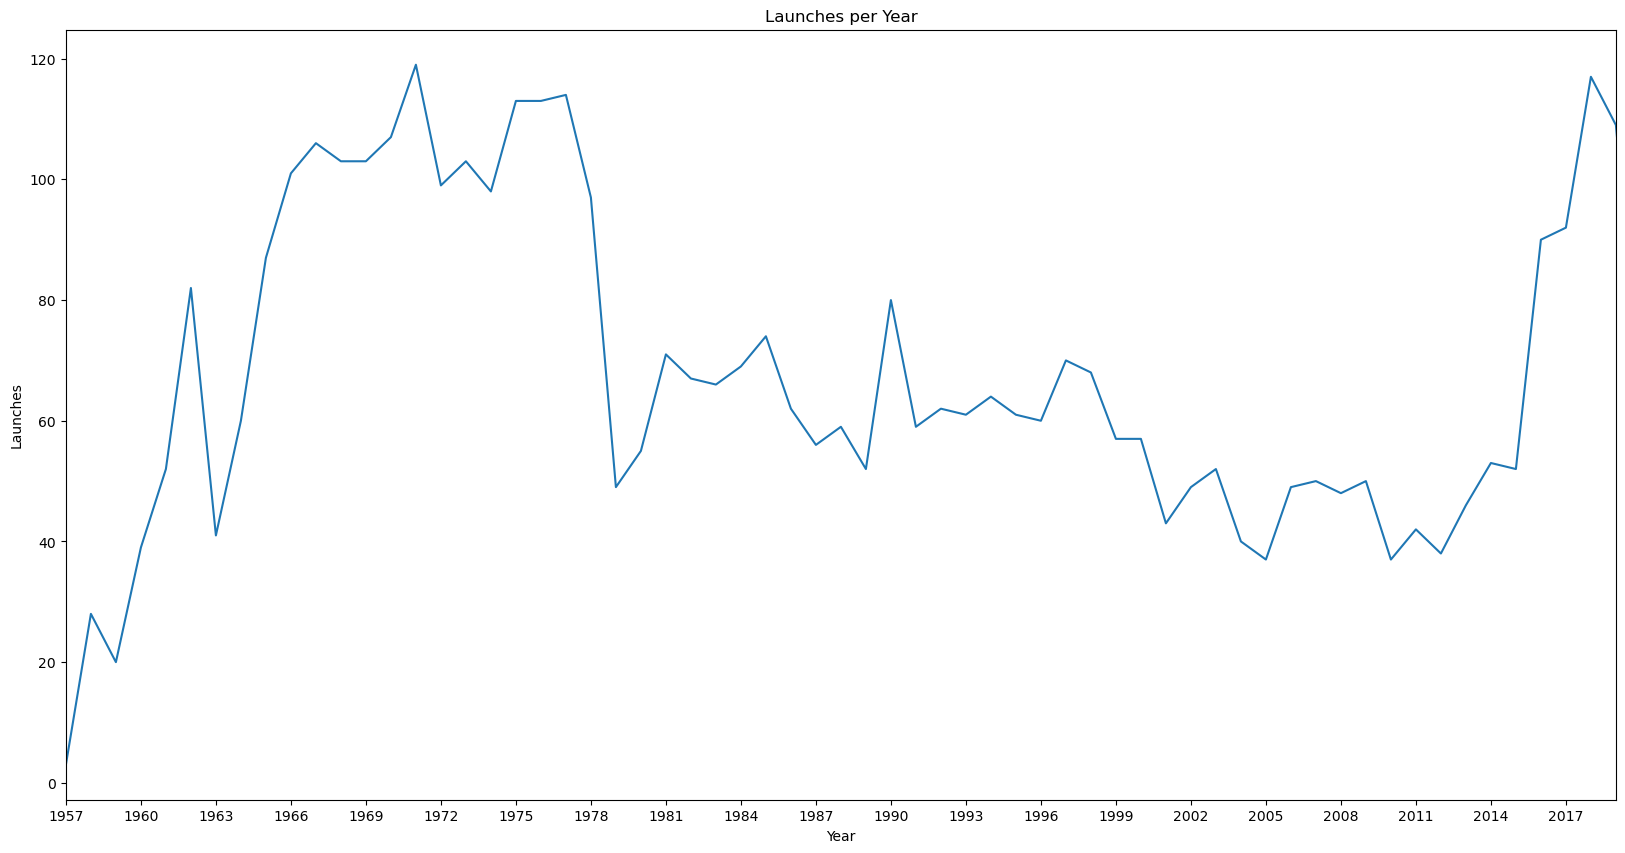

In [24]:
launches_per_year = df_data.groupby('year', observed=True, as_index=False).agg(launches = ('year','count'))

plt.subplots(figsize=(20, 10))
plt.title('Launches per Year')
sns.lineplot(
  data=launches_per_year,
  x='year', 
  y='launches'
)

plt.ylabel('Launches')
plt.xlabel('Year')
plt.xlim('1957', '2019')
plt.xticks([str(x) for x in np.arange(1957, 2019, 3)])
plt.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [25]:
# Format string
df_data['month_year'] = df_data['Date'].str[4:16].str.replace(',','')

# Convert to datetime
df_data['month_year'] = pd.to_datetime(df_data['month_year'])

# Change format to years only
df_data['month_year'] = df_data['month_year'].dt.strftime("%Y %m")



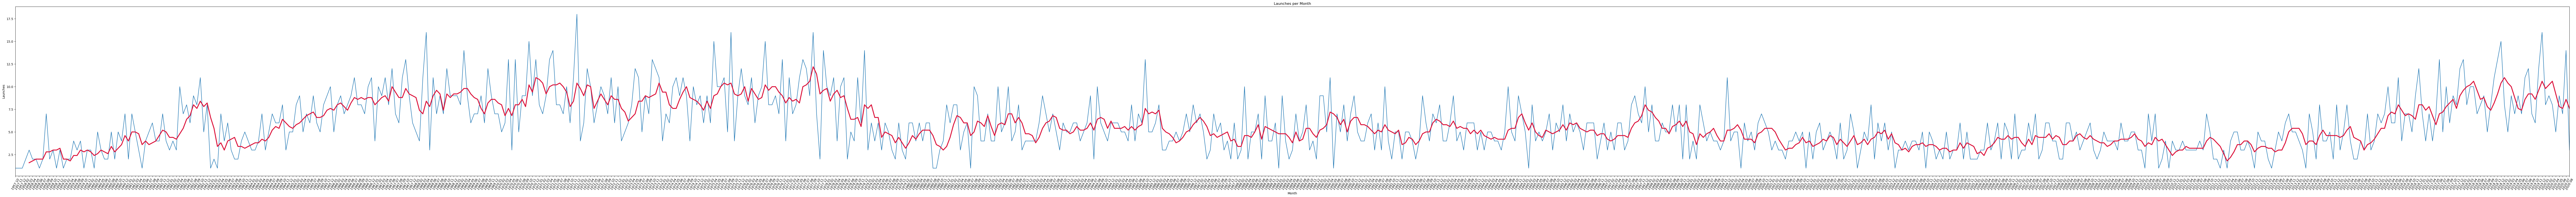

In [26]:
launches_per_month = df_data.groupby('month_year', observed=True, as_index=False).agg(launches = ('month_year','count'))

# Create rolling average df
roll_df = launches_per_month['launches'].rolling(window=5).mean()

import matplotlib.ticker as ticker

fig, axs = plt.subplots(figsize=(150, 10))
plt.title('Launches per Month')
sns.lineplot(
  data=launches_per_month,
  x='month_year', 
  y='launches'
)

axs.plot(launches_per_month.index, 
        roll_df.values, 
        c='crimson', 
        linewidth=3,)

plt.ylabel('Launches')
plt.xlabel('Month')
plt.xlim(str(df_data['month_year'].min()), str(df_data['month_year'].max()))

# axs.xaxis.set_minor_locator(ticker.AutoMinorLocator())
# axs.xaxis.set_major_locator(ticker.MaxNLocator(40))
plt.xticks(rotation=60)

plt.show()

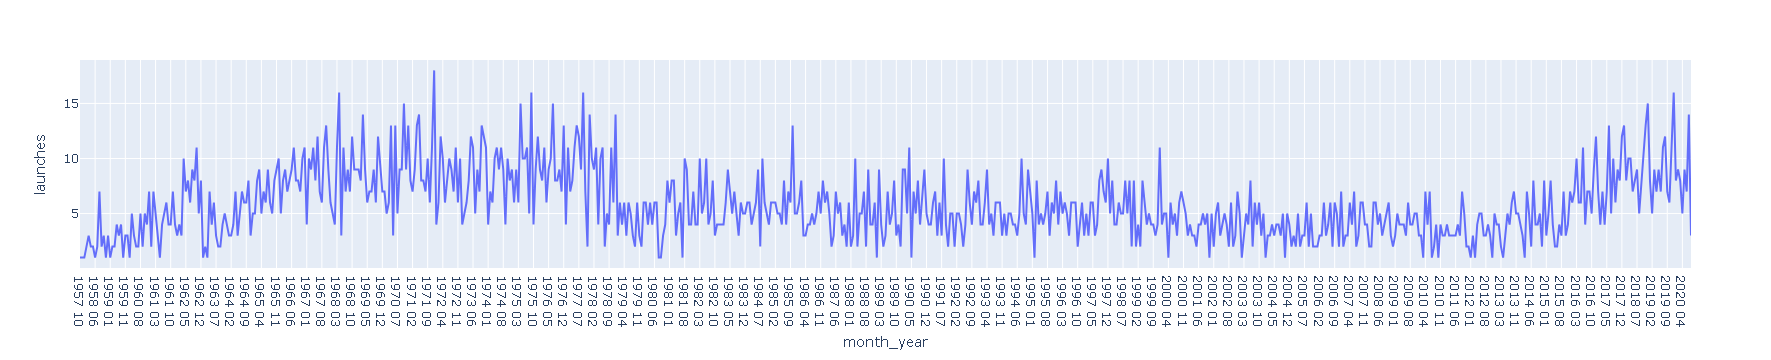

In [45]:
fig = px.line(launches_per_month, x='month_year', y='launches')
fig.show()

In [27]:
most_launches = launches_per_month.sort_values(by='launches', ascending=False).iloc[0]
print(f"The most launches where in {most_launches['month_year']}, where {most_launches['launches']} happened!")

The most launches where in 1971 12, where 18 happened!


# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [28]:
launches_per_month.sort_values(by='launches', ascending=False).iloc[:10]

month_year  launches
164    1971 12        18
233    1977 09        16
209    1975 09        16
738    2019 12        16
120    1968 04        16
726    2018 12        15
150    1970 10        15
204    1975 04        15
219    1976 07        15
236    1977 12        14

In [29]:
print("According to the top ten months with the highest amount of launches the time between September and December is best for space missions")

According to the top ten months with the highest amount of launches the time between September and December is best for space missions


# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

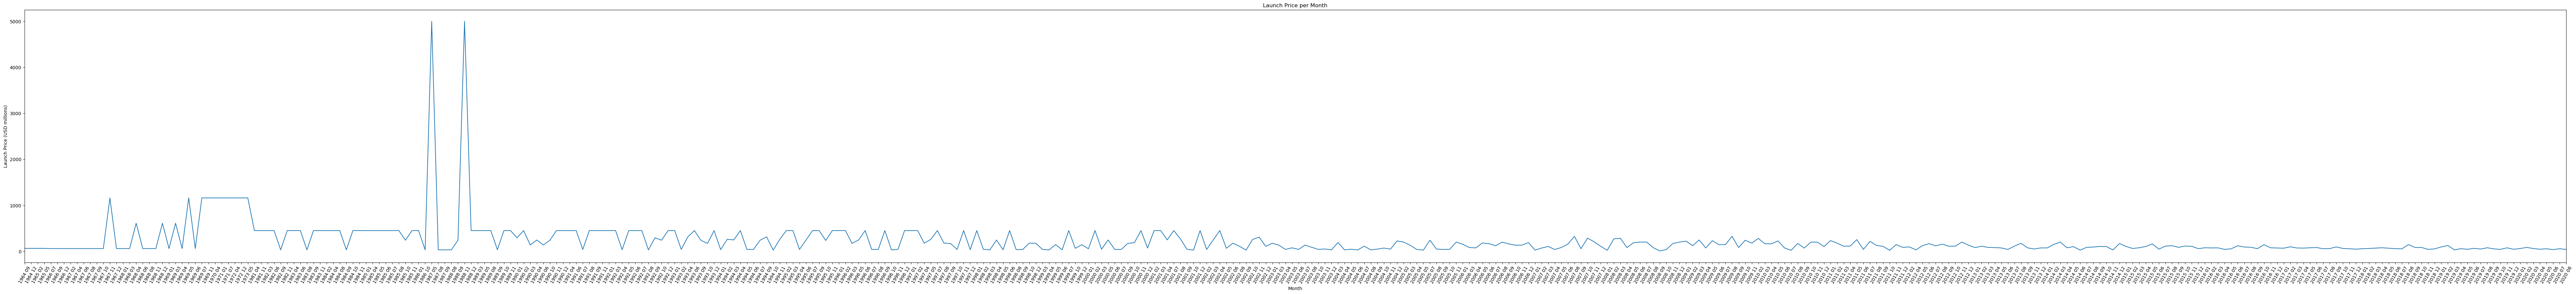

In [30]:
prices = df_data.loc[~df_data['Price'].isna()]
money_per_launch_month = prices.groupby('month_year', observed=True, as_index=False).agg(total_money_spent = ('Price','sum'), launches = ('Organisation','count'))
money_per_launch_month['money_per_launch'] = money_per_launch_month['total_money_spent'] / money_per_launch_month['launches']
money_per_launch_month.drop(columns=['total_money_spent', 'launches'], inplace=True)
money_per_launch_month.sort_values(by=['month_year'])

fig, axs = plt.subplots(figsize=(100, 10))
plt.title('Launch Price per Month')
sns.lineplot(
  data=money_per_launch_month,
  x='month_year', 
  y='money_per_launch'
)

plt.ylabel('Launch Price (USD millions)')
plt.xlabel('Month')
plt.xlim(str(money_per_launch_month['month_year'].min()), str(money_per_launch_month['month_year'].max()))
plt.xticks(rotation=60)

plt.show()

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

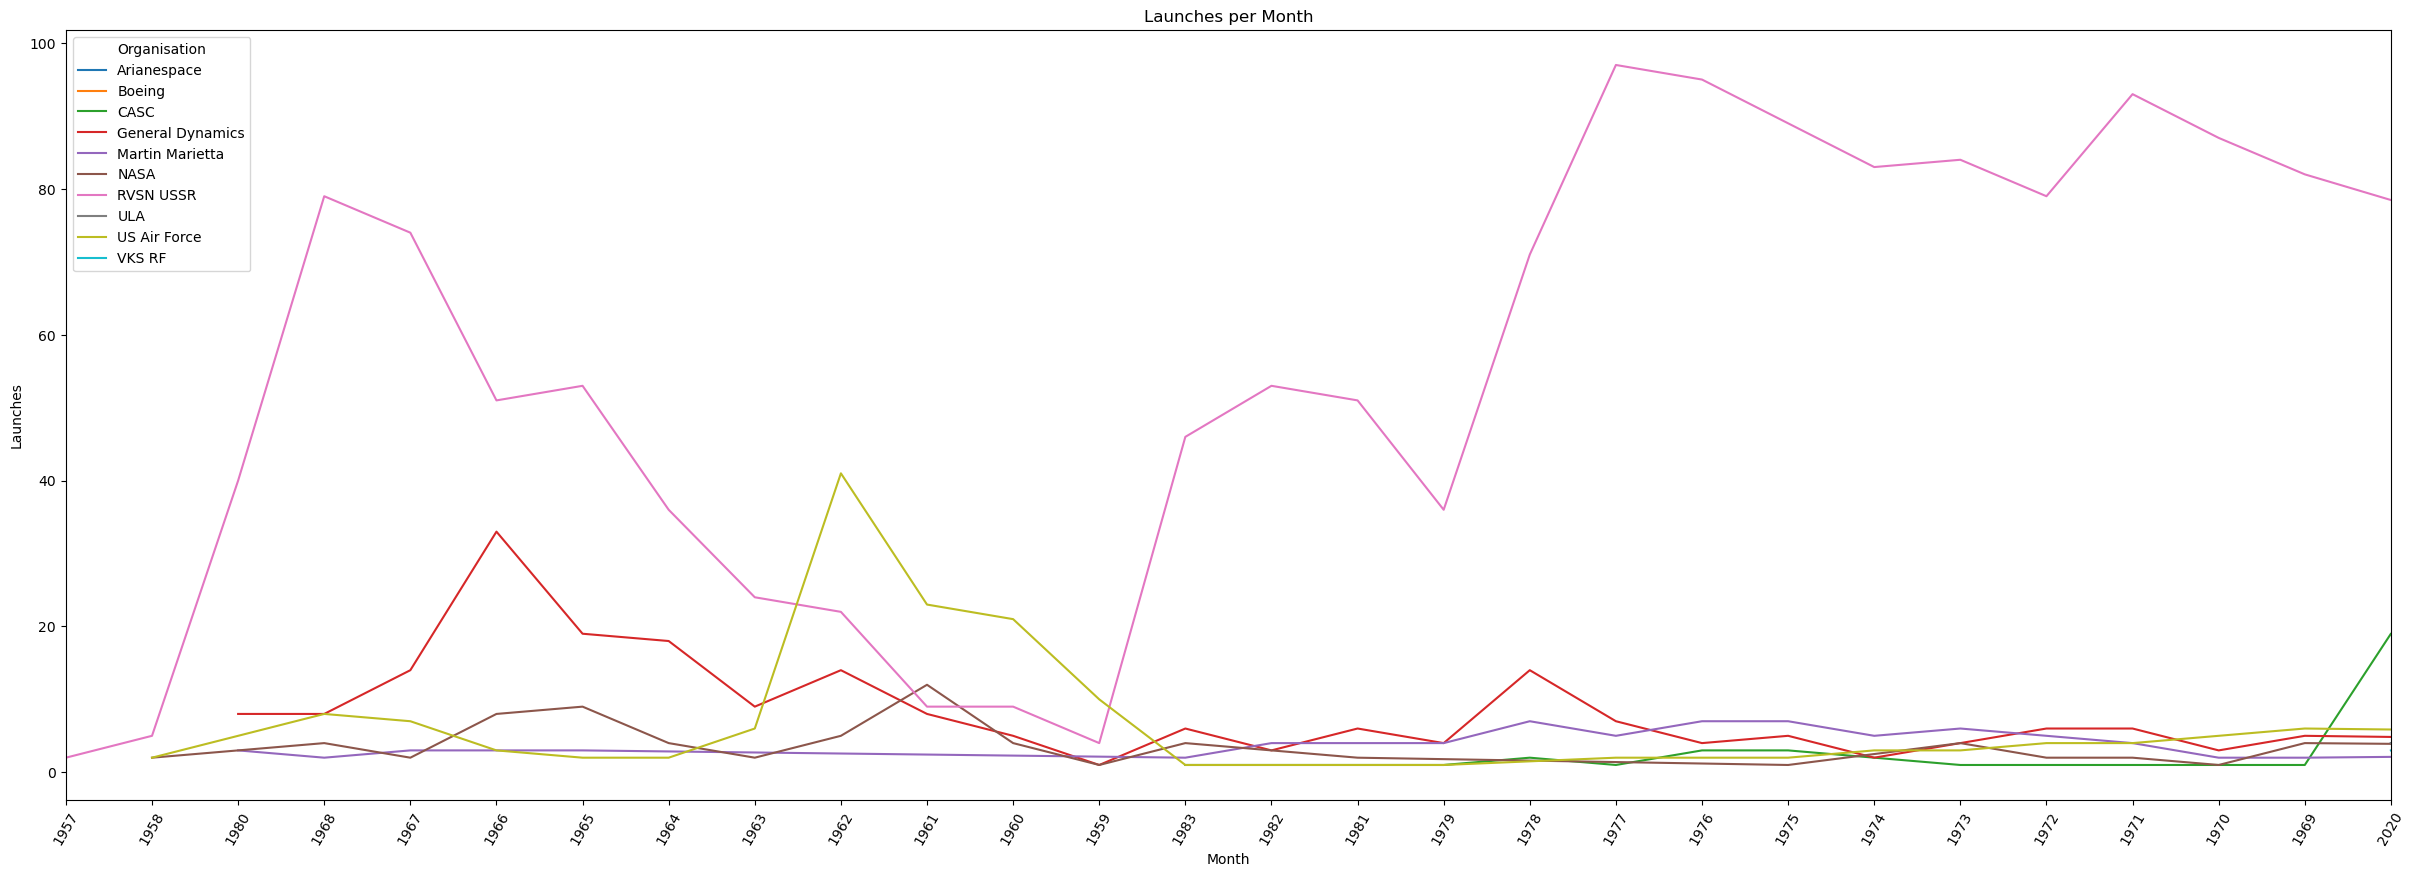

In [31]:
organisations = df_data.groupby('Organisation', observed=True, as_index=False)
top_10_org = organisations.agg(launches =('Date','count')).sort_values(by='launches', ascending=False).reset_index()['Organisation'][:10].tolist()
top_10_org_df = df_data[df_data['Organisation'].isin(top_10_org)]

org_launches_month = top_10_org_df.groupby(['Organisation', 'year'], observed=True, as_index=False).agg(launches = ('Date','count'))
org_launches_month.sort_values(by='year')

fig, axs = plt.subplots(figsize=(30, 10))
plt.title('Launches per Month')
sns.lineplot(
  data=org_launches_month,
  x='year', 
  y='launches',
  hue='Organisation'
)

plt.ylabel('Launches')
plt.xlabel('Month')
plt.xlim(str(org_launches_month['year'].min()), str(org_launches_month['year'].max()))
plt.xticks(rotation=60)

plt.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [32]:
cold_war = df_data['year'].between('1957', '1991')
cold_war_df = df_data[cold_war]

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [33]:
# turn countries into categories
cold_war_df['country'].astype('category')
# turn launches from Kazakhstan or Russia unto USSR
cold_war_df['country'] = cold_war_df['country'].str.replace('Kazakhstan', 'USSR')
cold_war_df['country'] = cold_war_df['country'].str.replace('Russian Federation', 'USSR')

# Only keep launches from USA or USSR
cold_war_df = cold_war_df.loc[(cold_war_df['country'] == 'USSR') | (cold_war_df['country'] == 'USA')]
# count launches from the superpowers
cold_war_launches = cold_war_df.groupby('country', as_index=False).agg(total_launches = ('Date','count'))

C:\Users\eric-\AppData\Local\Temp\ipykernel_24996\1215611437.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\eric-\AppData\Local\Temp\ipykernel_24996\1215611437.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



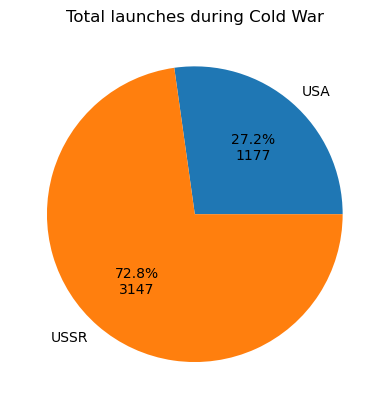

In [34]:
plt.figure()
plt.title('Total launches during Cold War')
plt.pie(data=cold_war_launches, x="total_launches", labels='country', autopct=fmt)

plt.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

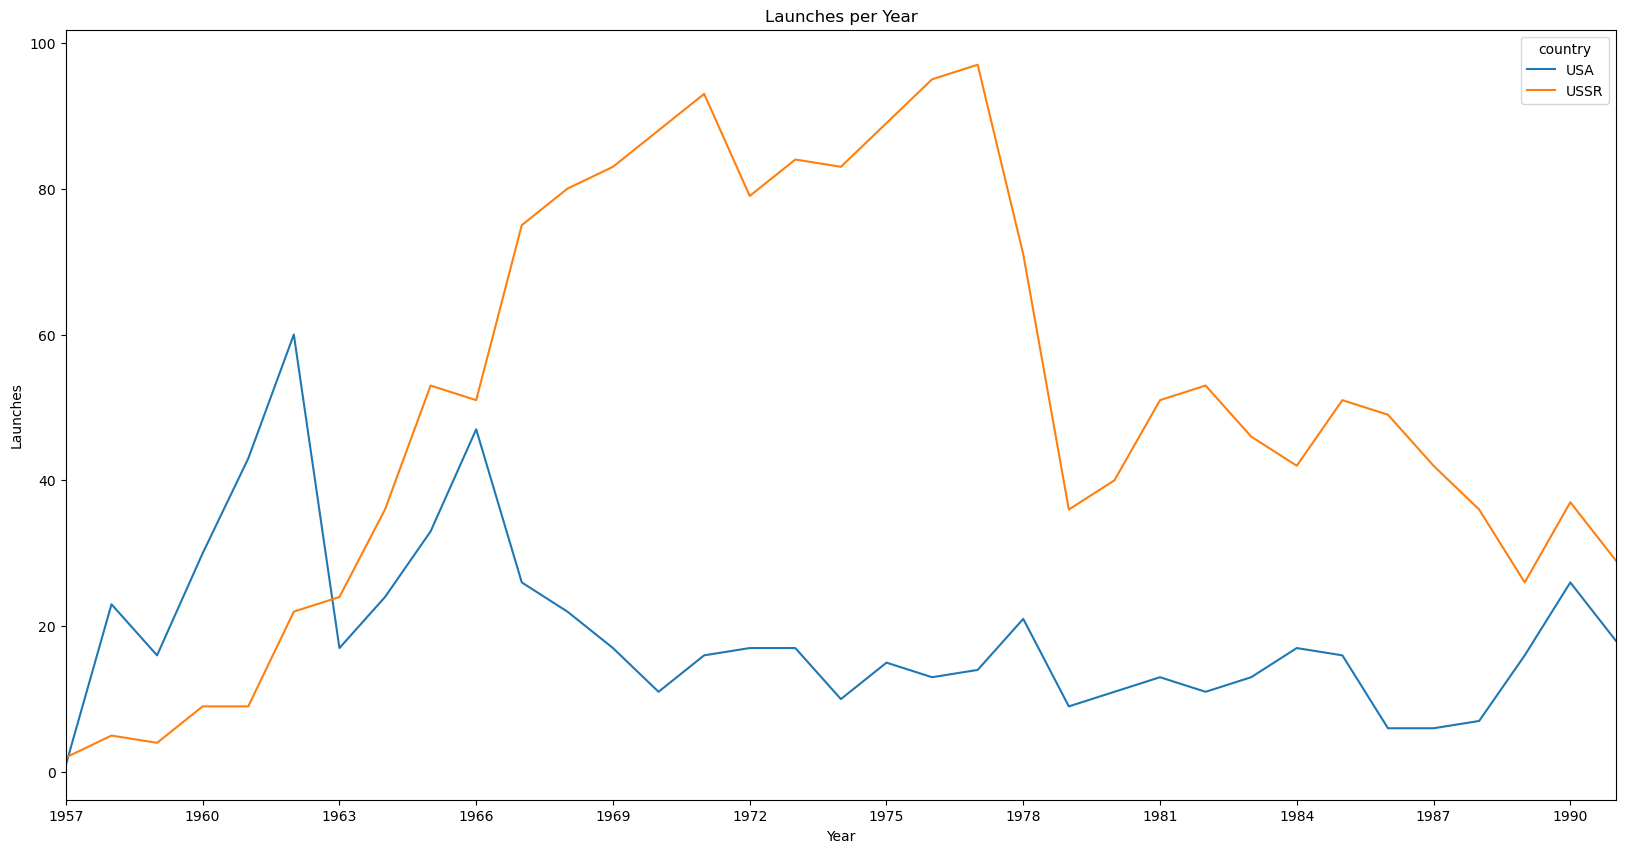

In [35]:
launches_per_year = cold_war_df.groupby(['year', 'country'], observed=True, as_index=False).agg(launches = ('year','count'))

plt.subplots(figsize=(20, 10))
plt.title('Launches per Year')
sns.lineplot(
  data=launches_per_year,
  x='year', 
  y='launches',
  hue='country'
)

plt.ylabel('Launches')
plt.xlabel('Year')
plt.xlim('1957', '1991')
plt.xticks([str(x) for x in np.arange(1957, 1991, 3)])
plt.show()

## Chart the Total Number of Mission Failures Year on Year.

In [36]:
# turn Partial Failure etc. into Failure
cold_war_df['Mission_Status'] = cold_war_df['Mission_Status'].str.replace('^.*Failure.*$', 'Failure', regex=True)

failures_per_year = cold_war_df.loc[cold_war_df['Mission_Status'] == 'Failure'].groupby(['year', 'country'], observed=True, as_index=False).agg(failures = ('year','count'))

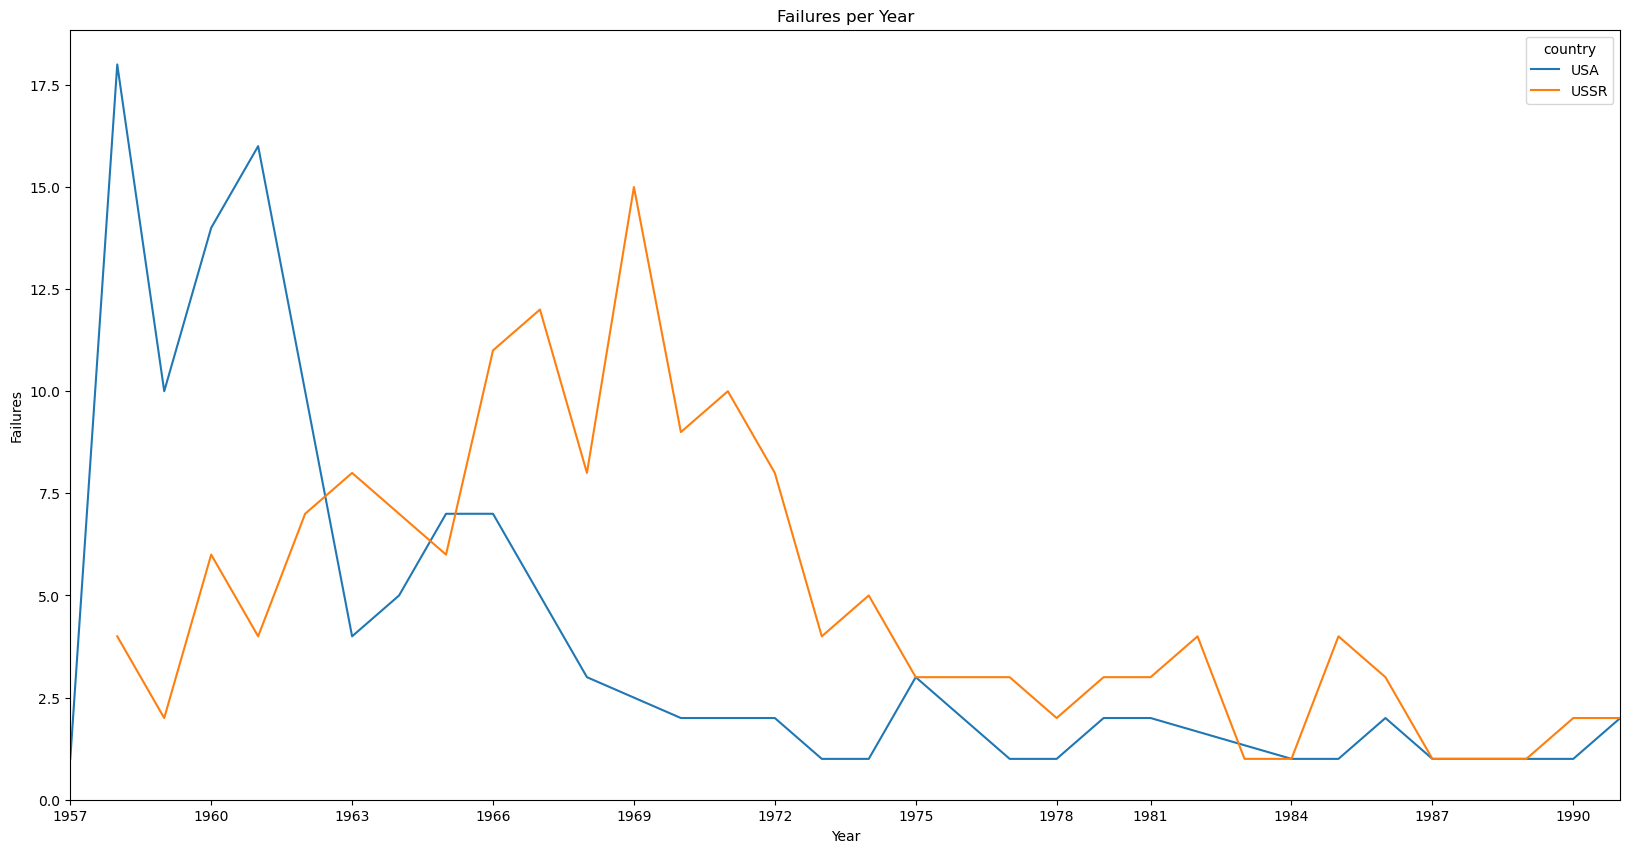

In [37]:
plt.subplots(figsize=(20, 10))
plt.title('Failures per Year')
sns.lineplot(
  data=failures_per_year,
  x='year', 
  y='failures',
  hue='country'
)

plt.ylabel('Failures')
plt.xlabel('Year')
plt.xlim('1957', '1991')
plt.ylim(0)
plt.xticks([str(x) for x in np.arange(1957, 1991, 3)])
plt.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [38]:
launches_per_year = launches_per_year.merge(right=failures_per_year, on=['year', 'country'])
launches_per_year['failure_perc'] = launches_per_year['failures'] / launches_per_year['launches'] * 100

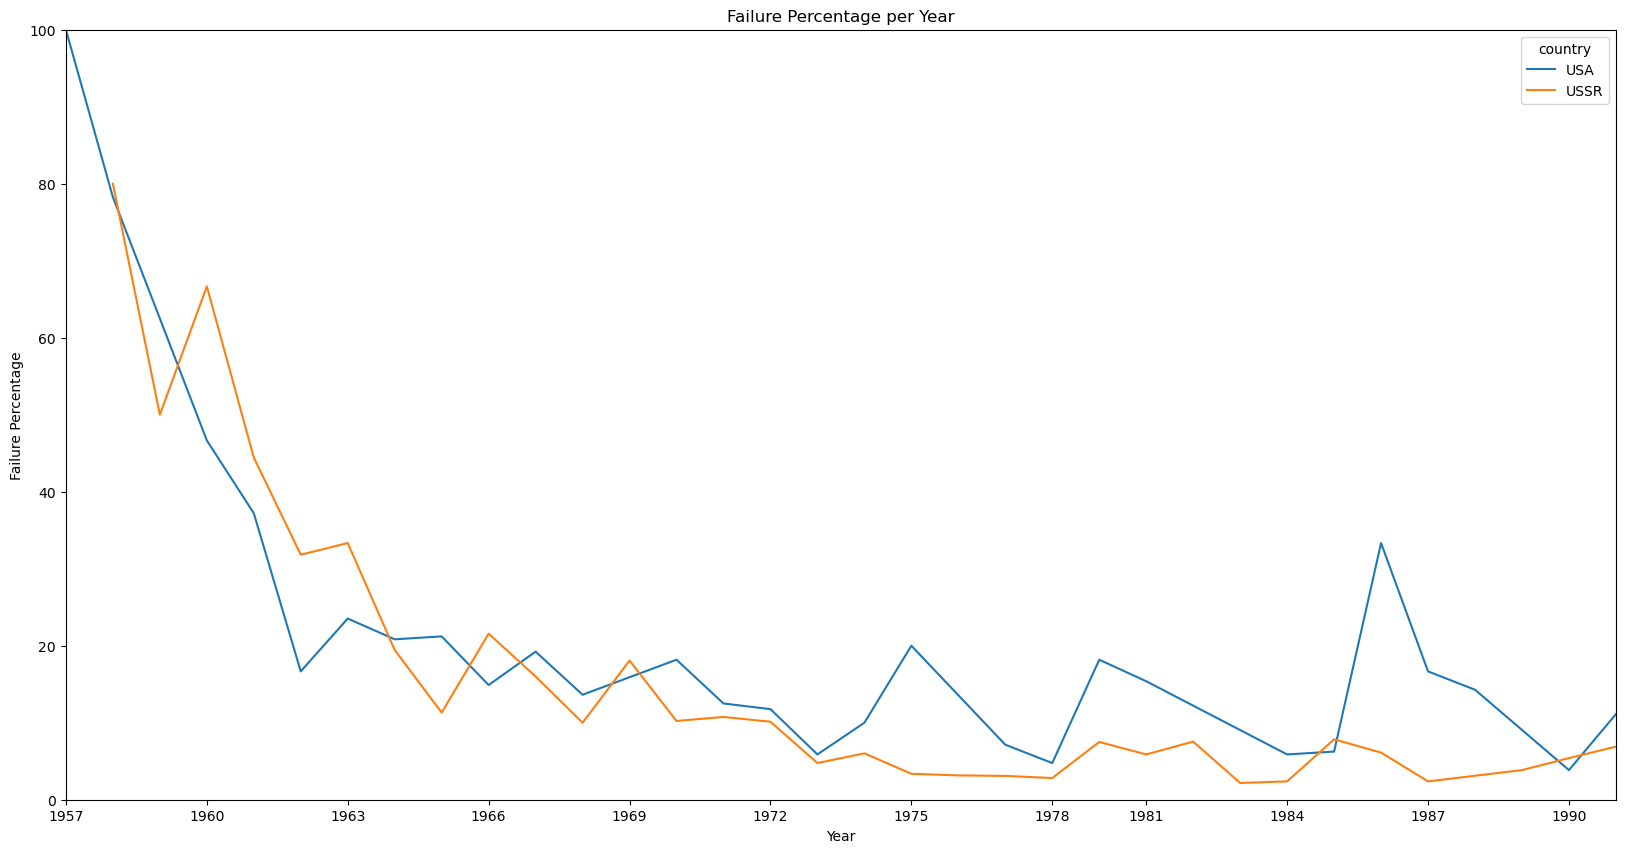

In [39]:
plt.subplots(figsize=(20, 10))
plt.title('Failure Percentage per Year')
sns.lineplot(
  data=launches_per_year,
  x='year', 
  y='failure_perc',
  hue='country'
)

plt.ylabel('Failure Percentage')
plt.xlabel('Year')
plt.xlim('1957', '1991')
plt.ylim(0, 100)
plt.xticks([str(x) for x in np.arange(1957, 1991, 3)])
plt.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [40]:
df_data['Mission_Status'] = df_data['Mission_Status'].str.replace('^.*Failure.*$', 'Failure', regex=True)

launches_per_country = df_data.groupby(['year', 'country'], as_index=False).agg(count = ('year','count'))
max_launches = launches_per_country.loc[launches_per_country.groupby('year')['count'].transform('max') == launches_per_country['count']]

succ_launches_per_country = df_data.loc[df_data['Mission_Status'] == 'Success'].groupby(['year', 'country', 'Mission_Status'], as_index=False).agg(count = ('year','count'))
max_succ_launches = succ_launches_per_country.loc[succ_launches_per_country.groupby('year')['count'].transform('max') == succ_launches_per_country['count']]

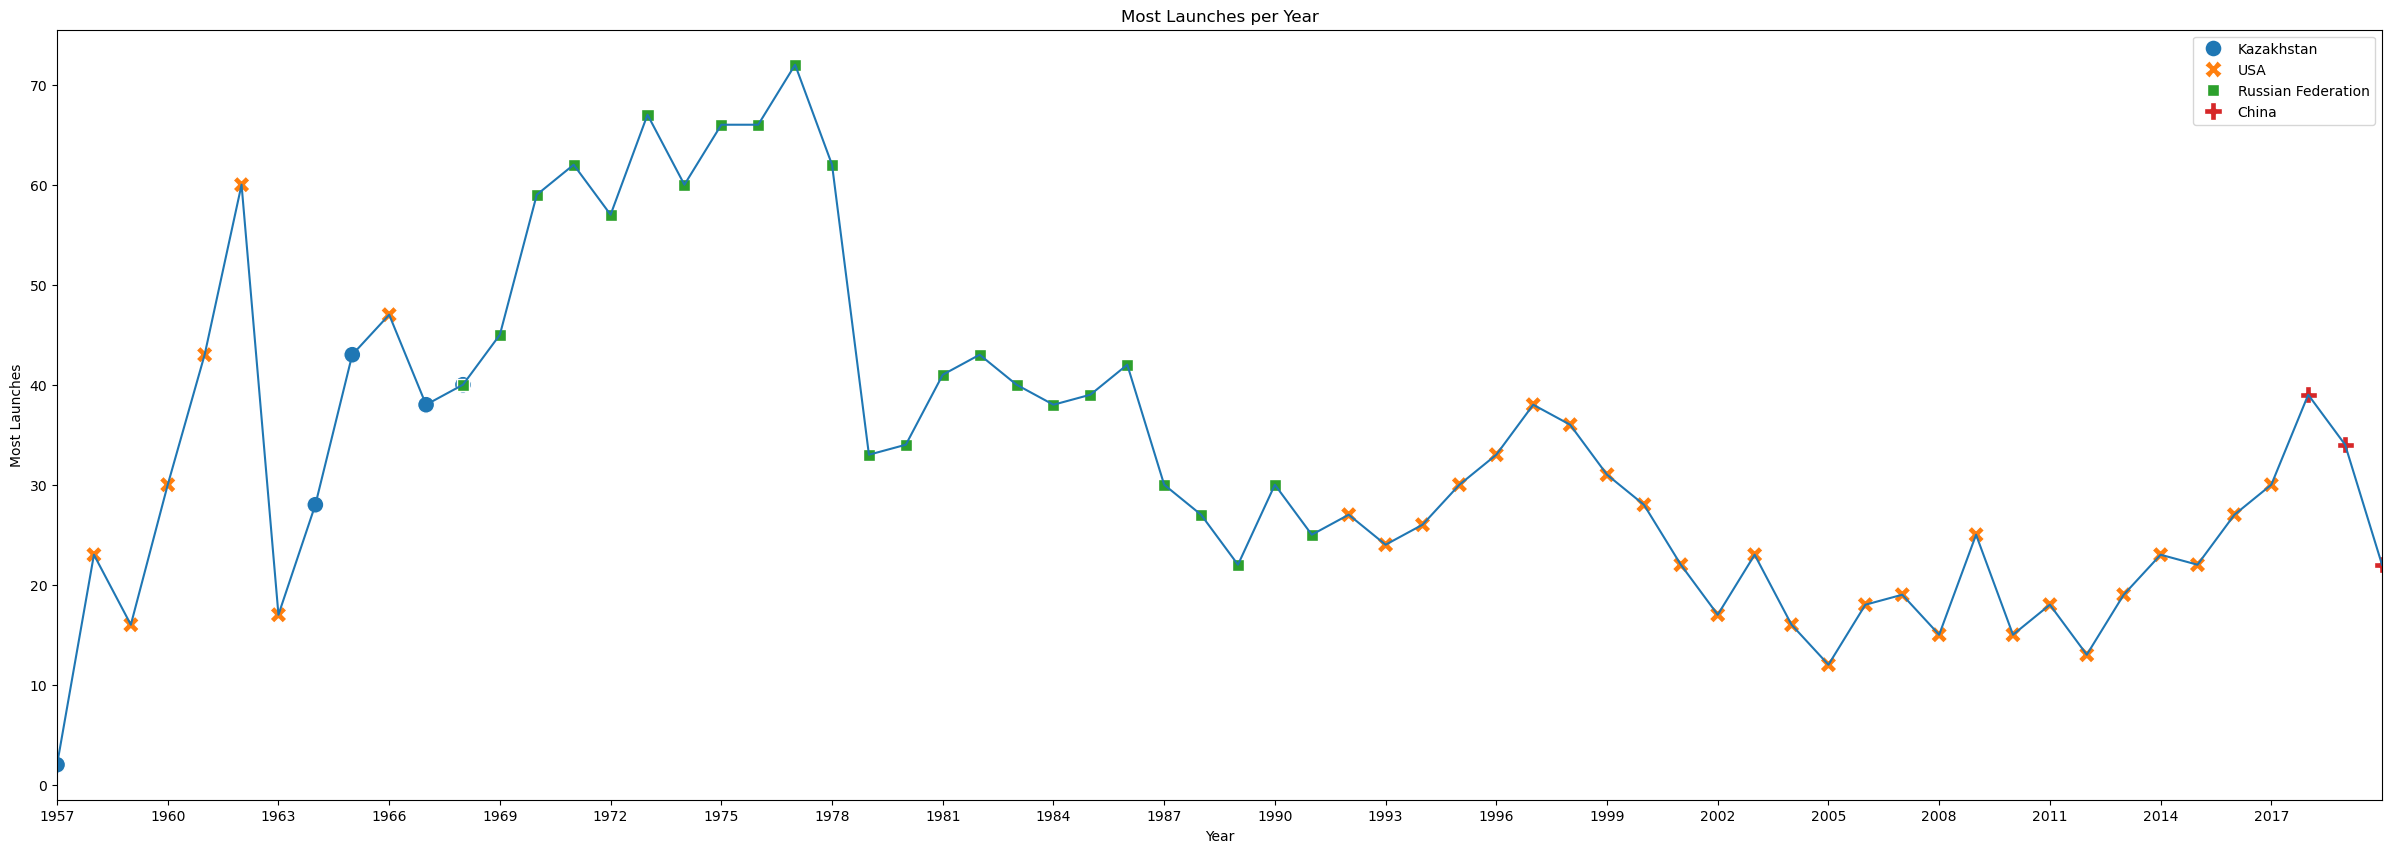

In [41]:
plt.figure(figsize=(30, 10))
plt.title('Most Launches per Year')
sns.scatterplot(
  data=max_launches, 
  x='year', 
  y='count',
  hue='country',
  style='country',
  s=150
)
plt.xlabel('Year')
plt.ylabel('Most Launches')

sns.lineplot(
  data=max_launches,
  x='year', 
  y='count'
)


plt.xlim('1957', '2020')
plt.xticks([str(x) for x in np.arange(1957, 2020, 3)])
plt.show()

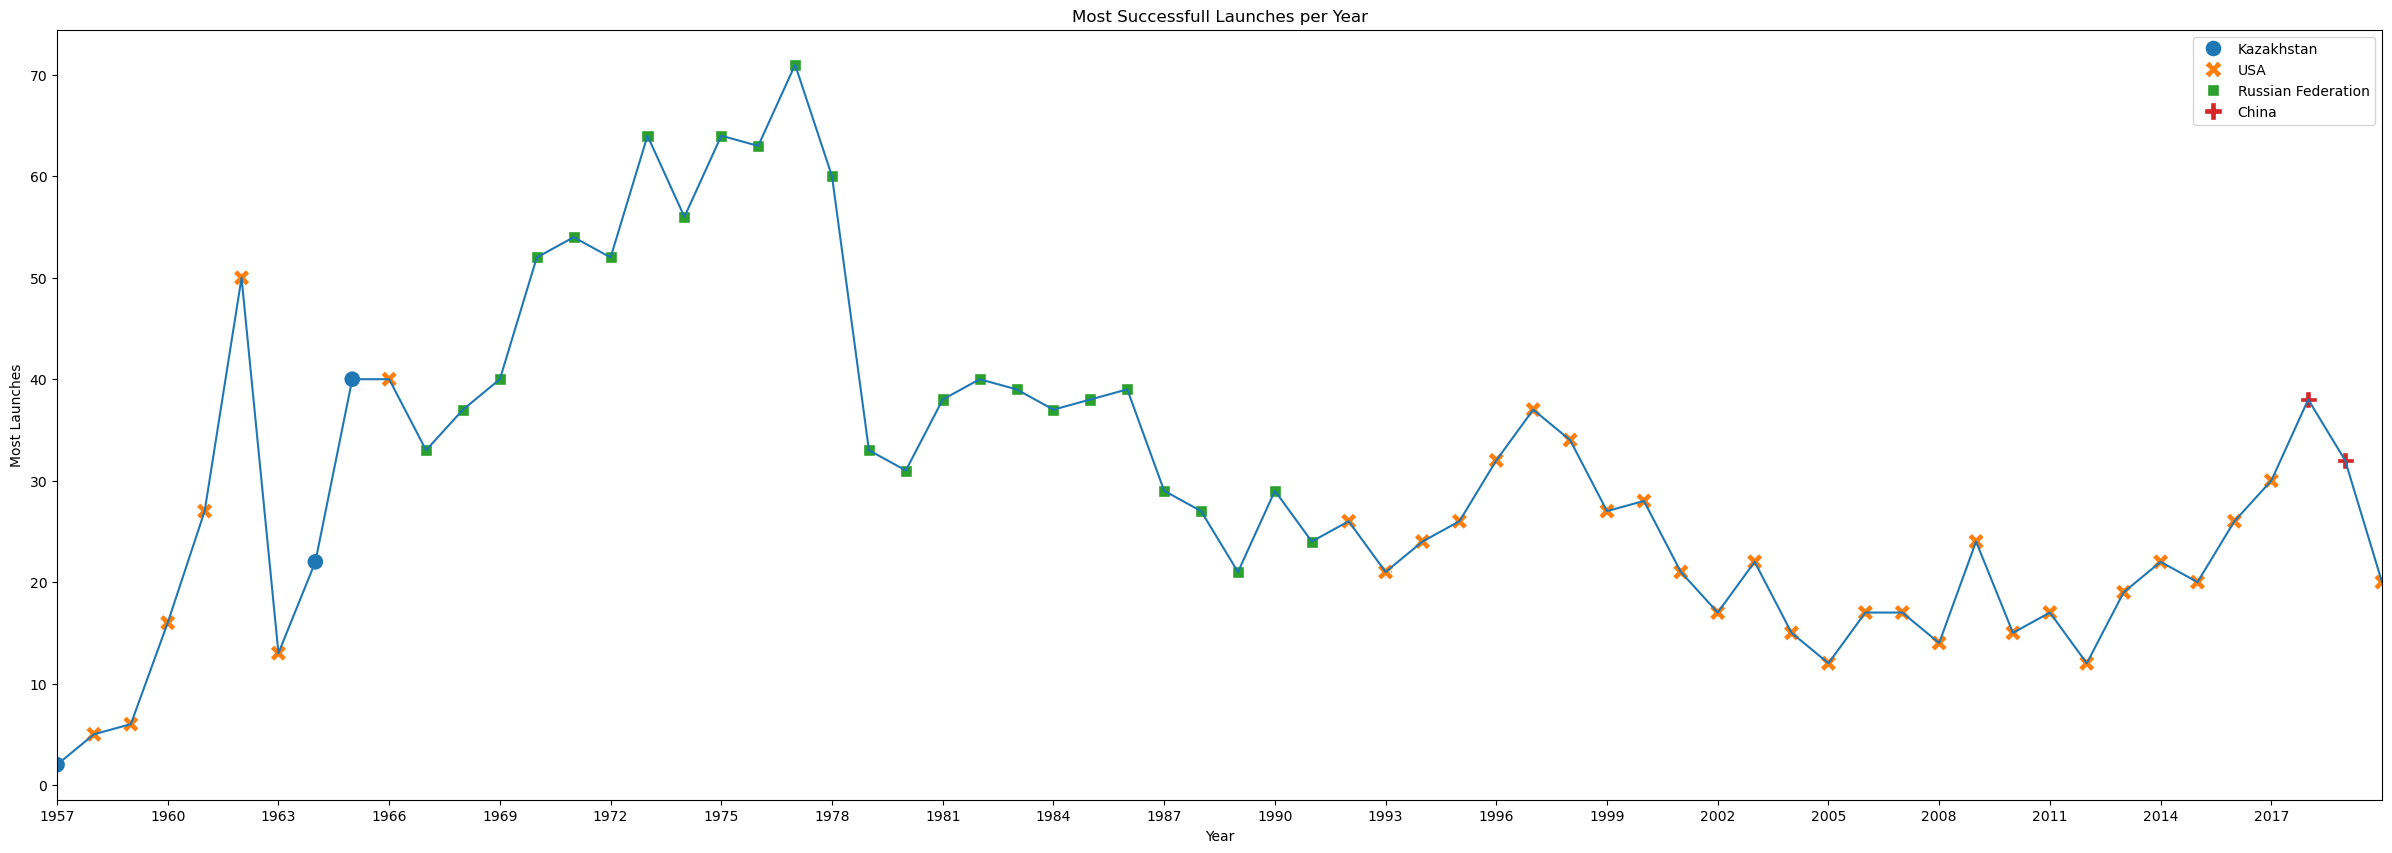

In [42]:
plt.figure(figsize=(30, 10))
plt.title('Most Successfull Launches per Year')
sns.scatterplot(
  data=max_succ_launches, 
  x='year', 
  y='count',
  hue='country',
  style='country',
  s=150
)
plt.xlabel('Year')
plt.ylabel('Most Launches')

sns.lineplot(
  data=max_succ_launches,
  x='year', 
  y='count'
)


plt.xlim('1957', '2020')
plt.xticks([str(x) for x in np.arange(1957, 2020, 3)])
plt.show()

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [43]:
launches_per_org = df_data.groupby(['year', 'Organisation'], as_index=False).agg(count = ('year','count'))
max_launches_org = launches_per_org.loc[launches_per_org.groupby('year')['count'].transform('max') == launches_per_org['count']]

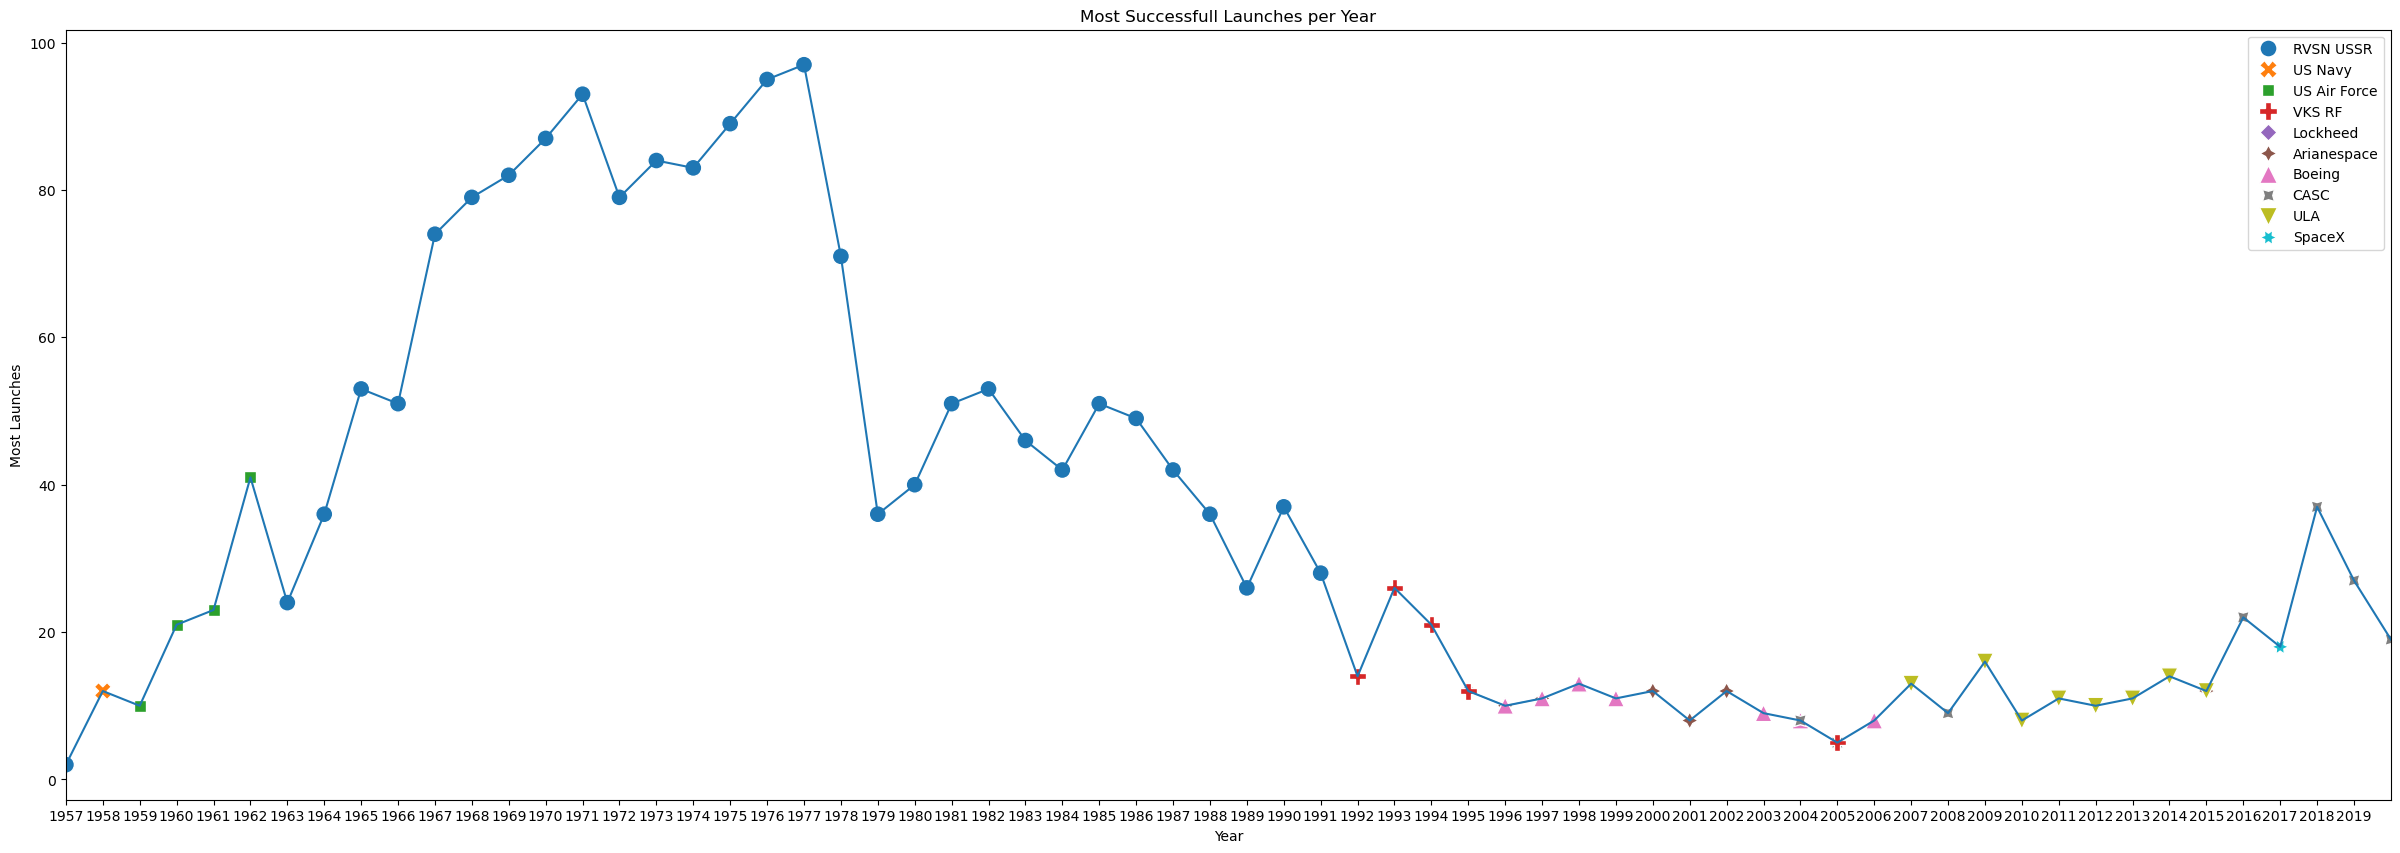

In [44]:
plt.figure(figsize=(30, 10))
plt.title('Most Successfull Launches per Year')
sns.scatterplot(
  data=max_launches_org, 
  x='year', 
  y='count',
  hue='Organisation',
  style='Organisation',
  s=150
)
plt.xlabel('Year')
plt.ylabel('Most Launches')

sns.lineplot(
  data=max_launches_org,
  x='year', 
  y='count'
)

plt.xlim('1957', '2020')
plt.xticks([str(x) for x in np.arange(1957, 2020, 1)])
plt.show()